Подключим библиотеки, получим датафрейм

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import random
from datetime import datetime, date, time

In [49]:
df = pd.read_csv(f'C:/Users/1/Jupyter Notebook/data/DataSet2.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019","In this early Western, notorious bandit the Ci...","Action & Adventure, Classics, Western, Romance",NaN,NR,"Irving Cummings, Raoul Walsh",Tom Barry,"Warner Baxter, Edmund Lowe, Dorothy Burgess, J...",1928-12-25,2017-03-12,20th Century Fox Film Corporation,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079","After being convicted of manslaughter, drunk d...","Classics, Drama",NaN,NR,George W. Hill,"Frances Marion, Martin Flavin, Joseph Farnham,...","Wallace Beery, Robert Montgomery, Chester Morr...",1930-05-14,2012-04-16,Warner Bros.,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


Посмотрим пропуски

In [50]:
df.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                          133
Genres                              132
Critic Consensus                    232
Content Rating                      132
Directors                           134
Authors                             134
Actors                              132
Original Release Date               132
Streaming Release Date              133
Production Company                  132
Tomatometer Status                  132
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                     135
Audience Rating                     132


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

In [52]:
df.duplicated().sum()

0

In [53]:
df.describe()

,Unnamed: 0,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,571.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000
mean,285.000000,1973.357268,124.894921,7.570403,87.503417,110.697039,82.428246,5.154145e+05,21.861048,98.471526,12.275626
std,164.977776,29.315738,26.322817,0.559652,11.690622,119.541406,10.927897,3.623107e+06,21.615492,107.798554,19.310232
min,0.000000,1927.000000,66.000000,5.600000,29.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,84.000000,25.000000,78.000000,6.637500e+03,5.000000,21.500000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,91.000000,54.000000,85.000000,3.716600e+04,11.000000,49.000000,5.000000
75%,427.500000,2001.000000,136.500000,7.900000,95.000000,199.000000,90.000000,1.255365e+05,45.000000,163.500000,15.000000
max,570.000000,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


In [54]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    40.630473
Audience Status                     23.642732
Authors                             23.467601
Directors                           23.467601
Movie Info                          23.292469
Streaming Release Date              23.292469
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Count                   23.117338
Production Company                  23.117338
Tomatometer Top Critics Count       23.117338
Genres                              23.117338
Tomatometer Fresh Critics Count     23.117338
Content Rating                      23.117338
Tomatometer Rotten Critics Count    23.117338
Tomatometer Status                  23.117338
Actors                              23.117338
Original Release Date               23.117338
Tomatometer Rating                  23.117338
Unnamed: 0                           0.000000
Film                                 0.000000
IMDB Votes                        

Заполним дату релиза серединой года выхода.

In [55]:
df.columns

Index(['Unnamed: 0', 'Film', 'Oscar Year', 'Film Studio/Producer(s)', 'Award',
       'Year of Release', 'Movie Time', 'Movie Genre', 'IMDB Rating',
       'IMDB Votes', 'Movie Info', 'Genres', 'Critic Consensus',
       'Content Rating', 'Directors', 'Authors', 'Actors',
       'Original Release Date', 'Streaming Release Date', 'Production Company',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
       'Tomatometer Rotten Critics Count', 'Film ID'],
      dtype='object')

удаляем ненужный столбец

In [56]:
df.drop (df.columns [[0]], axis= 1 , inplace= True )
df.head(5)

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [57]:
renamed_columns = {}
for column in df.columns:
    renamed_columns[column] = column.lower().strip()
df = df.rename(columns = renamed_columns)

df.columns

Index(['film', 'oscar year', 'film studio/producer(s)', 'award',
       'year of release', 'movie time', 'movie genre', 'imdb rating',
       'imdb votes', 'movie info', 'genres', 'critic consensus',
       'content rating', 'directors', 'authors', 'actors',
       'original release date', 'streaming release date', 'production company',
       'tomatometer status', 'tomatometer rating', 'tomatometer count',
       'audience status', 'audience rating', 'audience count',
       'tomatometer top critics count', 'tomatometer fresh critics count',
       'tomatometer rotten critics count', 'film id'],
      dtype='object')

In [58]:
df = df.rename(columns={'film studio/producer(s)' : 'film studio'})
df.columns

Index(['film', 'oscar year', 'film studio', 'award', 'year of release',
       'movie time', 'movie genre', 'imdb rating', 'imdb votes', 'movie info',
       'genres', 'critic consensus', 'content rating', 'directors', 'authors',
       'actors', 'original release date', 'streaming release date',
       'production company', 'tomatometer status', 'tomatometer rating',
       'tomatometer count', 'audience status', 'audience rating',
       'audience count', 'tomatometer top critics count',
       'tomatometer fresh critics count', 'tomatometer rotten critics count',
       'film id'],
      dtype='object')

In [104]:
sorted (df['film studio'].unique())

['20th Century',
 '20th Century-Fox',
 'A. Kitman Ho and Oliver Stone',
 'Aaron Rosenberg',
 'Adele Romanski, Dede Gardner, and Jeremy Kleiner',
 'Alan J. Pakula',
 'Alan Marshall and David Puttnam',
 'Albert Berger and Ron Yerxa',
 'Albert S. Ruddy',
 'Alberto Grimaldi and Harvey Weinstein',
 'Alejandro G. Iñárritu, John Lesher, and James W. Skotchdopole',
 'Alejandro González Iñárritu, Steve Golin, and Jon Kilik',
 'Alfonso Cuarón and David Heyman',
 'Alison Owen, Eric Fellner and Tim Bevan',
 'Alix Madigan and Anne Rosellini',
 'Amy Pascal',
 'Amy Pascal, Steven Spielberg, and Kristie Macosko Krieger',
 'Anatole Litvak and Frank McCarthy',
 'Andy Harries, Christine Langan, and Tracey Seaward',
 'Anthony Havelock-Allan and John Brabourne',
 'Anthony Minghella, Sydney Pollack, Donna Gigliotti, and Redmond Morris',
 'Argosy-Wanger',
 'Arlene Donovan',
 'Arnold Kopelson',
 'Arnon Milchan, Steve Golin, Alejandro G. Iñárritu, Mary Parent, and Keith Redmon',
 'Arthur Freed',
 'Arthur Hornb

In [106]:
def replace_wrong_stud (wrong_stud, correct_stud):
    for wrong_genre in wrong_stud:
        df['film studio'] = df['film studio'].replace(wrong_stud, correct_stud)

duplicates = ['20th Century-Fox','Fox']
name = '20th Century'
replace_wrong_stud(duplicates, name)
df['film studio'] = df['film studio'].replace('Warner Bros.-First National', 'Warner Bros.')

заполнили точную дату выхожа серединой года

In [107]:
f = lambda x : str(x)+"-02-07"
df['original release date'] = df['original release date'].fillna(df['year of release'].transform(f))
df.head(10)

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,20th Century,Nominee,1927,110,"Drama,Romance",7.7,3439,unknown,"Drama,Romance",unknown,NR,Frank Lloyd,Reginald Berkeley,"Charles Laughton, Clark Gable, Franchot Tone, ...",1927-02-07,2007-06-01,20th Century Fox Film Corporation,Certified-Fresh,-1.0,100.0,Spilled,83.0,-1.0,20.0,89.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,1257,unknown,"Crime,Drama,Film-Noir",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2016-12-14,Fox,Certified-Fresh,-1.0,100.0,Upright,73.0,-1.0,20.0,89.0,11.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,"Action,Crime,Romance",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1929-02-07,2019-09-12,Fox,Certified-Fresh,-1.0,100.0,Upright,63.0,-1.0,20.0,89.0,11.0,609887c2-877c-43a4-b88c-e40e31096a98
5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,2004,unknown,"Comedy,Music",unknown,NR,George Cukor,"Anita Loos, Erich von Stroheim, Robert E. Hopkins","Ingrid Bergman, Charles Boyer, Joseph Cotten, ...",1929-02-07,2007-06-01,MGM,Fresh,-1.0,100.0,Upright,62.0,-1.0,20.0,89.0,11.0,689f22d5-a700-4ce1-b9be-65652f32c186
6,In Old Arizona,1928/29,20th Century,Nominee,1928,95,Western,5.6,1019,"In this early Western, notorious bandit the Ci...","Action & Adventure, Classics, Western, Romance",unknown,NR,"Irving Cummings, Raoul Walsh",Tom Barry,"Warner Baxter, Edmund Lowe, Dorothy Burgess, J...",1928-12-25,2017-03-12,20th Century Fox Film Corporation,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,unknown,"Drama,History,Thriller",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2007-06-01,Fox,Certified-Fresh,-1.0,100.0,Upright,80.0,-1.0,20.0,89.0,11.0,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,59214,unknown,"Drama,,Action & Adventure",unknown,G,Henry Koster,"Adele Comandini, Austin Parker","Deanna Durbin, Ray Milland, Binnie Barnes, Nan...",1930-02-07,2016-12-14,20th Century Fox,Fresh,-1.0,100.0,Spilled,88.0,-1.0,20.0,89.0,11.0,281742f9-3b4e-480d-b704-c8c15de6b721
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...","Classics, Drama",unknown,NR,George W. Hill,

In [108]:
df.isna().sum()

film                                0
oscar year                          0
film studio                         0
award                               0
year of release                     0
movie time                          0
movie genre                         0
imdb rating                         0
imdb votes                          0
movie info                          0
genres                              0
critic consensus                    0
content rating                      0
directors                           0
authors                             0
actors                              0
original release date               0
streaming release date              0
production company                  0
tomatometer status                  0
tomatometer rating                  0
tomatometer count                   0
audience status                     0
audience rating                     0
audience count                      0
tomatometer top critics count       0
tomatometer 

In [109]:
f = lambda x: str(x).replace("War", ",Action & Adventure") if "War" in str(x) else (str(x) +",Action & Adventure" if "Western" in str(x) else  str(x))
df['genres'] = df['genres'].fillna(df['movie genre'].transform(f))
df.head(5)

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,20th Century,Nominee,1927,110,"Drama,Romance",7.7,3439,unknown,"Drama,Romance",unknown,NR,Frank Lloyd,Reginald Berkeley,"Charles Laughton, Clark Gable, Franchot Tone, ...",1927-02-07,2007-06-01,20th Century Fox Film Corporation,Certified-Fresh,-1.0,100.0,Spilled,83.0,-1.0,20.0,89.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,1257,unknown,"Crime,Drama,Film-Noir",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2016-12-14,Fox,Certified-Fresh,-1.0,100.0,Upright,73.0,-1.0,20.0,89.0,11.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,"Action,Crime,Romance",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1929-02-07,2019-09-12,Fox,Certified-Fresh,-1.0,100.0,Upright,63.0,-1.0,20.0,89.0,11.0,609887c2-877c-43a4-b88c-e40e31096a98


In [110]:
df ['original release date'] = pd.to_datetime(df['original release date'],format = '%Y-%m-%d')
df ['streaming release date'] = pd.to_datetime(df['streaming release date'],format = '%Y-%m-%d')

In [111]:
df['movie info'] = df['movie info'].fillna("unknown")
df['critic consensus'] = df['critic consensus'].fillna('unknown')

f = lambda x: x.mode().iat[0] if x.notna().any() else 'unknown' 

director_series = df.groupby('film studio')['directors'].transform(f)
df['directors'] = df['directors'].fillna(director_series)

actors_series = df.groupby('directors')['actors'].transform(f)
df['actors'] = df['actors'].fillna(actors_series)

authors_series = df.groupby('film studio')['authors'].transform(f)
df['authors'] = df['authors'].fillna(authors_series)

companies_series = df.groupby('directors')['production company'].transform(f)
df['production company'] = df['production company'].fillna(companies_series)

status_series = df.groupby('directors')['tomatometer status'].transform(f)
df['tomatometer status'] = df['tomatometer status'].fillna(status_series)

aud_series = df.groupby('directors')['audience status'].transform(f)
df['audience status'] = df['audience status'].fillna(aud_series)

content = lambda x: x.mode().iat[0] if x.notna().any() else 'NR'

content_df = df.groupby('directors')['content rating'].transform(content)
df['content rating'] = df['content rating'].fillna(content_df)

netflix = date(2007, 6, 1)
d = [netflix, date(2019, 9, 12), date(2016, 12, 14)]
g = lambda x: x if (x > pd.Timestamp(netflix)) else random.choice(d)

df['streaming release date'] = df['streaming release date'].fillna(df['original release date'].transform(g))

votes = lambda x: int(str(x).replace(',',''))

df['imdb votes'] = df['imdb votes'].transform(votes).astype(int)
df.head(5)

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,20th Century,Nominee,1927,110,"Drama,Romance",7.7,3439,unknown,"Drama,Romance",unknown,NR,Frank Lloyd,Reginald Berkeley,"Charles Laughton, Clark Gable, Franchot Tone, ...",1927-02-07,2007-06-01,20th Century Fox Film Corporation,Certified-Fresh,-1.0,100.0,Spilled,83.0,-1.0,20.0,89.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,1257,unknown,"Crime,Drama,Film-Noir",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2016-12-14,Fox,Certified-Fresh,-1.0,100.0,Upright,73.0,-1.0,20.0,89.0,11.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,"Action,Crime,Romance",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1929-02-07,2019-09-12,Fox,Certified-Fresh,-1.0,100.0,Upright,63.0,-1.0,20.0,89.0,11.0,609887c2-877c-43a4-b88c-e40e31096a98


In [112]:
df.describe()[['imdb rating','tomatometer rating','audience rating']]

,imdb rating,tomatometer rating,audience rating
count,571.000000,571.000000,571.000000
mean,7.570403,67.043783,81.809107
min,5.600000,-1.000000,21.000000
25%,7.300000,57.500000,77.000000
50%,7.600000,87.000000,83.000000
75%,7.900000,94.000000,89.000000
max,9.300000,100.000000,98.000000
std,0.559652,38.724848,10.243029


найдём корреляции на полность заполненном датасете

In [113]:
temp_df = df.dropna()
outlier = temp_df[['imdb rating','tomatometer rating','audience rating']]
outlier

,imdb rating,tomatometer rating,audience rating
0,7.5,93.0,78.0
1,7.7,-1.0,83.0
2,6.7,-1.0,73.0
3,5.7,33.0,21.0
4,5.8,-1.0,63.0
...,...,...,...
566,6.9,-1.0,75.0
567,7.5,-1.0,81.0
568,7.5,-1.0,81.0
569,7.8,-1.0,85.0


In [114]:
Q1 = outlier.quantile(0.25)
Q1

imdb rating            7.3
tomatometer rating    57.5
audience rating       77.0
Name: 0.25, dtype: float64

In [115]:
Q3 = outlier.quantile(0.75)
Q3

imdb rating            7.9
tomatometer rating    94.0
audience rating       89.0
Name: 0.75, dtype: float64

In [116]:
IQR = Q3-Q1

data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,imdb rating,tomatometer rating,audience rating
0,7.5,93.0,78.0
9,7.1,75.0,69.0
18,7.4,86.0,77.0
21,7.3,90.0,74.0
27,7.4,96.0,74.0
...,...,...,...
552,7.6,90.0,79.0
553,7.2,65.0,60.0
557,7.8,96.0,86.0
559,8.4,68.0,88.0


In [117]:
index_list = list(data_filtered.index.values)
data_filtered = temp_df[temp_df.index.isin(index_list)]
data_filtered.head()

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...","Classics, Drama",unknown,NR,George W. Hill,"Frances Marion, Martin Flavin, Joseph Farnham,...","Wallace Beery, Robert Montgomery, Chester Morr...",1930-05-14,2012-04-16,Warner Bros.,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562
18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,Winner,1932,112,"Drama,Romance",7.4,18314,"At a luxurious Berlin hotel between the wars, ...","Classics, Drama, Romance",Perhaps less a true film than a series of star...,NR,Edmund Goulding,William A. Drake,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",1932-01-01,2016-12-20,MGM Home Entertainment,Certified-Fresh,86.0,42.0,Upright,77.0,7014.0,10.0,36.0,6.0,be69f946-6adc-47e4-8491-79d6c033f59d
21,The Champ,1931/32,Metro-Goldwyn-Mayer,Nominee,1931,86,"Drama,Sport",7.3,3003,Champ (Wallace Beery) is a down-on-his-luck bo...,"Classics, Drama, Kids & Family",unknown,NR,King Vidor,"Frances Marion, Leonard Praskins, Wanda Tuchock","Wallace Beery, Jackie Cooper, Irene Rich, Rosc...",1931-11-21,2017-01-04,MGM,Fresh,90.0,10.0,Upright,74.0,617.0,2.0,9.0,1.0,c8994348-093e-4e22-8ffe-6ad3332a2bab
27,42nd Street,1932/33,Warner Bros.,Nominee,1933,89,"Comedy,Drama,Musical",7.4,11342,When revered Broadway director Julian Marsh (W...,Musical & Performing Arts,"Bubsy Berkeley does it again in 42nd Street, a...",NR,Lloyd Bacon,"Rian James, James Seymour, Whitney Bolton","Warner Baxter, Bebe Daniels, George Brent, Rub...",1933-03-09,2012-04-16,MGM Home Entertainment,Fresh,96.0,25.0,Upright,74.0,7561.0,4.0,24.0,1.0,1ad59370-1ed5-4d3a-a8c4-8571f95da168


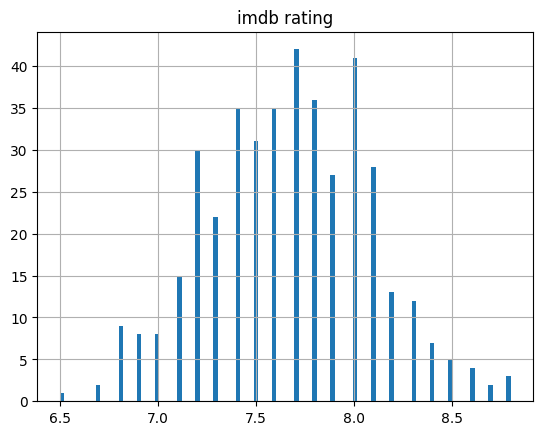

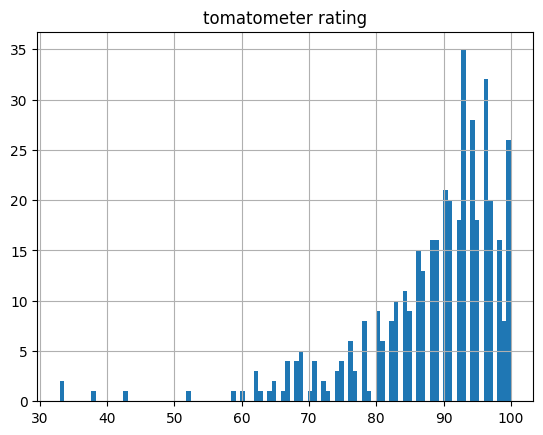

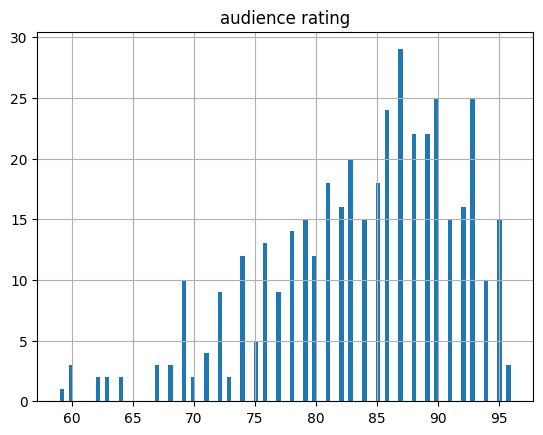

In [118]:
filtered_outlier = data_filtered[['imdb rating','tomatometer rating','audience rating']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [119]:
temp_filtered = data_filtered[['imdb rating','tomatometer count','tomatometer rating','audience rating','audience count','tomatometer count','movie time','year of release','tomatometer rotten critics count', 'tomatometer fresh critics count', 'tomatometer top critics count']]
temp_filtered.corr()

,imdb rating,tomatometer count,tomatometer rating,audience rating,audience count,tomatometer count,movie time,year of release,tomatometer rotten critics count,tomatometer fresh critics count,tomatometer top critics count
imdb rating,1.000000,0.237113,0.342068,0.836532,0.144203,0.237113,0.186813,0.140609,0.107410,0.243875,0.256352
tomatometer count,0.237113,1.000000,0.060800,0.074465,0.039311,1.000000,0.075850,0.806330,0.664279,0.990746,0.942369
tomatometer rating,0.342068,0.060800,1.000000,0.352420,-0.035768,0.060800,-0.239714,-0.066417,-0.398693,0.139985,0.059637
audience rating,0.836532,0.074465,0.352420,1.000000,-0.063271,0.074465,0.097920,0.088190,-0.046125,0.091117,0.113060
audience count,0.144203,0.039311,-0.035768,-0.063271,1.000000,0.039311,0.148896,0.078287,0.065768,0.031675,0.097825
tomatometer count,0.237113,1.000000,0.060800,0.074465,0.039311,1.000000,0.075850,0.806330,0.664279,0.990746,0.942369
movie time,0.186813,0.075850,-0.239714,0.097920,0.148896,0.075850,1.000000,0.166432,0.166682,0.053973,0.095430
year of release,0.140609,0.806330,-0.066417,0.088190,0.078287,0.806330,0.166432,1.000000,0.577360,0.791177,0.848845
tomatometer rotten critics count,0.107410,0.664279,-0.398693,-0.046125,0.065768,0.664279,0.166682,0.577360,1.000000,0.556689,0.610085
tomatometer fresh critics count,0.243875,0.990746,0.139985,0.091117,0.031675,0.990746,0.053973,0.791177,0.556689,1.000000,0.936434


In [120]:
df.isna().sum()

film                                0
oscar year                          0
film studio                         0
award                               0
year of release                     0
movie time                          0
movie genre                         0
imdb rating                         0
imdb votes                          0
movie info                          0
genres                              0
critic consensus                    0
content rating                      0
directors                           0
authors                             0
actors                              0
original release date               0
streaming release date              0
production company                  0
tomatometer status                  0
tomatometer rating                  0
tomatometer count                   0
audience status                     0
audience rating                     0
audience count                      0
tomatometer top critics count       0
tomatometer 

Заполним столбцы на основе найденных корреляций

In [121]:
df.describe()[['imdb rating','audience rating']]

,imdb rating,audience rating
count,571.000000,571.000000
mean,7.570403,81.809107
min,5.600000,21.000000
25%,7.300000,77.000000
50%,7.600000,83.000000
75%,7.900000,89.000000
max,9.300000,98.000000
std,0.559652,10.243029


In [122]:
rating = lambda x: round(x*(82.4/7.6))
df['audience rating'] = df['audience rating'].fillna(df['imdb rating'].transform(rating))
df.head(5)

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,20th Century,Nominee,1927,110,"Drama,Romance",7.7,3439,unknown,"Drama,Romance",unknown,NR,Frank Lloyd,Reginald Berkeley,"Charles Laughton, Clark Gable, Franchot Tone, ...",1927-02-07,2007-06-01,20th Century Fox Film Corporation,Certified-Fresh,-1.0,100.0,Spilled,83.0,-1.0,20.0,89.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,1257,unknown,"Crime,Drama,Film-Noir",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2016-12-14,Fox,Certified-Fresh,-1.0,100.0,Upright,73.0,-1.0,20.0,89.0,11.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,"Action,Crime,Romance",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1929-02-07,2019-09-12,Fox,Certified-Fresh,-1.0,100.0,Upright,63.0,-1.0,20.0,89.0,11.0,609887c2-877c-43a4-b88c-e40e31096a98


In [123]:
df.describe()[['year of release','tomatometer count']]

,year of release,tomatometer count
count,571.000000,571.000000
mean,1973.357268,108.224168
min,1927.000000,5.000000
25%,1944.000000,33.000000
50%,1972.000000,82.000000
75%,2001.000000,100.000000
max,2021.000000,574.000000
std,29.315738,104.886717


In [124]:
tomat_count = lambda x: round(x*(110.7/1973)) if round(x*(110.7/1973))<=100 else 100
df['tomatometer count'] = df['tomatometer count'].fillna(df['year of release'].transform(tomat_count))
df.head(5)

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,20th Century,Nominee,1927,110,"Drama,Romance",7.7,3439,unknown,"Drama,Romance",unknown,NR,Frank Lloyd,Reginald Berkeley,"Charles Laughton, Clark Gable, Franchot Tone, ...",1927-02-07,2007-06-01,20th Century Fox Film Corporation,Certified-Fresh,-1.0,100.0,Spilled,83.0,-1.0,20.0,89.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,1257,unknown,"Crime,Drama,Film-Noir",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2016-12-14,Fox,Certified-Fresh,-1.0,100.0,Upright,73.0,-1.0,20.0,89.0,11.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,"Action,Crime,Romance",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1929-02-07,2019-09-12,Fox,Certified-Fresh,-1.0,100.0,Upright,63.0,-1.0,20.0,89.0,11.0,609887c2-877c-43a4-b88c-e40e31096a98


In [125]:
df.describe()[['tomatometer count','tomatometer rotten critics count','tomatometer top critics count','tomatometer fresh critics count']]

,tomatometer count,tomatometer rotten critics count,tomatometer top critics count,tomatometer fresh critics count
count,571.000000,571.000000,571.000000,571.000000
mean,108.224168,11.980736,21.430823,96.281961
min,5.000000,0.000000,0.000000,3.000000
25%,33.000000,2.000000,7.000000,28.000000
50%,82.000000,9.000000,20.000000,75.000000
75%,100.000000,11.000000,26.000000,89.000000
max,574.000000,182.000000,69.000000,495.000000
std,104.886717,16.935833,18.964326,94.580288


In [126]:
tomat_rotten = lambda x: round(x*(12.3/110.6))
df['tomatometer rotten critics count'] = df['tomatometer rotten critics count'].fillna(df['tomatometer count'].transform(tomat_rotten))

tomat_top = lambda x: round(x*(21.9/110.6))
df['tomatometer top critics count'] = df['tomatometer top critics count'].fillna(df['tomatometer count'].transform(tomat_top))

tomat_fresh = lambda x: round(x*(98.5/110.6))
df['tomatometer fresh critics count'] = df['tomatometer fresh critics count'].fillna(df['tomatometer count'].transform(tomat_fresh))
df.head(5)

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,20th Century,Nominee,1927,110,"Drama,Romance",7.7,3439,unknown,"Drama,Romance",unknown,NR,Frank Lloyd,Reginald Berkeley,"Charles Laughton, Clark Gable, Franchot Tone, ...",1927-02-07,2007-06-01,20th Century Fox Film Corporation,Certified-Fresh,-1.0,100.0,Spilled,83.0,-1.0,20.0,89.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,1257,unknown,"Crime,Drama,Film-Noir",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2016-12-14,Fox,Certified-Fresh,-1.0,100.0,Upright,73.0,-1.0,20.0,89.0,11.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,"Action,Crime,Romance",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1929-02-07,2019-09-12,Fox,Certified-Fresh,-1.0,100.0,Upright,63.0,-1.0,20.0,89.0,11.0,609887c2-877c-43a4-b88c-e40e31096a98


Никаких корреляций томатного рейтинга и количества просмотров не было найдёно, заполним их выбросами 

In [127]:
df['audience count'] = df['audience count'].fillna(-1)
df['tomatometer rating'] = df['tomatometer rating'].fillna(-1)
df.head(5)

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,20th Century,Nominee,1927,110,"Drama,Romance",7.7,3439,unknown,"Drama,Romance",unknown,NR,Frank Lloyd,Reginald Berkeley,"Charles Laughton, Clark Gable, Franchot Tone, ...",1927-02-07,2007-06-01,20th Century Fox Film Corporation,Certified-Fresh,-1.0,100.0,Spilled,83.0,-1.0,20.0,89.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,1257,unknown,"Crime,Drama,Film-Noir",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1928-02-07,2016-12-14,Fox,Certified-Fresh,-1.0,100.0,Upright,73.0,-1.0,20.0,89.0,11.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,unknown,"Action,Crime,Romance",unknown,NR,unknown,unknown,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1929-02-07,2019-09-12,Fox,Certified-Fresh,-1.0,100.0,Upright,63.0,-1.0,20.0,89.0,11.0,609887c2-877c-43a4-b88c-e40e31096a98


In [128]:
df.isna().sum()
df.describe()[['imdb rating','tomatometer count','tomatometer rating','audience rating','audience count','tomatometer count','movie time','year of release','tomatometer rotten critics count', 'tomatometer fresh critics count', 'tomatometer top critics count']]

,imdb rating,tomatometer count,tomatometer rating,audience rating,audience count,tomatometer count,movie time,year of release,tomatometer rotten critics count,tomatometer fresh critics count,tomatometer top critics count
count,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,7.570403,108.224168,67.043783,81.809107,3.962641e+05,108.224168,124.894921,1973.357268,11.980736,96.281961,21.430823
min,5.600000,5.000000,-1.000000,21.000000,-1.000000e+00,5.000000,66.000000,1927.000000,0.000000,3.000000,0.000000
25%,7.300000,33.000000,57.500000,77.000000,4.830000e+02,33.000000,107.000000,1944.000000,2.000000,28.000000,7.000000
50%,7.600000,82.000000,87.000000,83.000000,1.100100e+04,82.000000,121.000000,1972.000000,9.000000,75.000000,20.000000
75%,7.900000,100.000000,94.000000,89.000000,7.009000e+04,100.000000,136.500000,2001.000000,11.000000,89.000000,26.000000
max,9.300000,574.000000,100.000000,98.000000,3.579764e+07,574.000000,238.000000,2021.000000,182.000000,495.000000,69.000000
std,0.559652,104.886717,38.724848,10.243029,3.183439e+06,104.886717,26.322817,29.315738,16.935833,94.580288,18.964326


Все столбцы заполнены, теперь сравним получившуюся статистику с чистым датасетом

In [129]:
int_df = df[['imdb rating','tomatometer count','tomatometer rating','audience rating','audience count','tomatometer count','movie time','year of release','tomatometer rotten critics count', 'tomatometer fresh critics count', 'tomatometer top critics count']]
Q1 = int_df.quantile(0.25)
Q1

imdb rating                            7.3
tomatometer count                     33.0
tomatometer rating                    57.5
audience rating                       77.0
audience count                       483.0
tomatometer count                     33.0
movie time                           107.0
year of release                     1944.0
tomatometer rotten critics count       2.0
tomatometer fresh critics count       28.0
tomatometer top critics count          7.0
Name: 0.25, dtype: float64

In [130]:
Q3 = int_df.quantile(0.75)
Q3

imdb rating                             7.9
tomatometer count                     100.0
tomatometer rating                     94.0
audience rating                        89.0
audience count                      70090.0
tomatometer count                     100.0
movie time                            136.5
year of release                      2001.0
tomatometer rotten critics count       11.0
tomatometer fresh critics count        89.0
tomatometer top critics count          26.0
Name: 0.75, dtype: float64

In [131]:
IQR = Q3-Q1

data_filtered = int_df[~((int_df < (Q1 - 1.5 * IQR)) |(int_df > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,imdb rating,tomatometer count,tomatometer rating,audience rating,audience count,tomatometer count,movie time,year of release,tomatometer rotten critics count,tomatometer fresh critics count,tomatometer top critics count
0,7.5,46.0,93.0,78.0,3530.0,46.0,144,1927,3.0,43.0,9.0
9,7.1,8.0,75.0,69.0,323.0,8.0,87,1930,2.0,6.0,0.0
18,7.4,42.0,86.0,77.0,7014.0,42.0,112,1932,6.0,36.0,10.0
21,7.3,10.0,90.0,74.0,617.0,10.0,86,1931,1.0,9.0,2.0
27,7.4,25.0,96.0,74.0,7561.0,25.0,89,1933,1.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
426,7.2,160.0,86.0,78.0,48527.0,160.0,131,2001,22.0,138.0,36.0
427,7.4,138.0,93.0,81.0,20122.0,138.0,131,2001,9.0,129.0,32.0
447,7.3,196.0,90.0,82.0,115946.0,196.0,114,2005,20.0,176.0,43.0
484,7.2,174.0,94.0,76.0,51756.0,174.0,100,2010,10.0,164.0,44.0


In [132]:
index_list = list(data_filtered.index.values)
data_filtered = df[int_df.index.isin(index_list)]
data_filtered.head()

,film,oscar year,film studio,award,year of release,movie time,movie genre,imdb rating,imdb votes,movie info,genres,critic consensus,content rating,directors,authors,actors,original release date,streaming release date,production company,tomatometer status,tomatometer rating,tomatometer count,audience status,audience rating,audience count,tomatometer top critics count,tomatometer fresh critics count,tomatometer rotten critics count,film id
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,12221,"With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,2079,"After being convicted of manslaughter, drunk d...","Classics, Drama",unknown,NR,George W. Hill,"Frances Marion, Martin Flavin, Joseph Farnham,...","Wallace Beery, Robert Montgomery, Chester Morr...",1930-05-14,2012-04-16,Warner Bros.,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562
18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,Winner,1932,112,"Drama,Romance",7.4,18314,"At a luxurious Berlin hotel between the wars, ...","Classics, Drama, Romance",Perhaps less a true film than a series of star...,NR,Edmund Goulding,William A. Drake,"Greta Garbo, John Barrymore, Joan Crawford, Wa...",1932-01-01,2016-12-20,MGM Home Entertainment,Certified-Fresh,86.0,42.0,Upright,77.0,7014.0,10.0,36.0,6.0,be69f946-6adc-47e4-8491-79d6c033f59d
21,The Champ,1931/32,Metro-Goldwyn-Mayer,Nominee,1931,86,"Drama,Sport",7.3,3003,Champ (Wallace Beery) is a down-on-his-luck bo...,"Classics, Drama, Kids & Family",unknown,NR,King Vidor,"Frances Marion, Leonard Praskins, Wanda Tuchock","Wallace Beery, Jackie Cooper, Irene Rich, Rosc...",1931-11-21,2017-01-04,MGM,Fresh,90.0,10.0,Upright,74.0,617.0,2.0,9.0,1.0,c8994348-093e-4e22-8ffe-6ad3332a2bab
27,42nd Street,1932/33,Warner Bros.,Nominee,1933,89,"Comedy,Drama,Musical",7.4,11342,When revered Broadway director Julian Marsh (W...,Musical & Performing Arts,"Bubsy Berkeley does it again in 42nd Street, a...",NR,Lloyd Bacon,"Rian James, James Seymour, Whitney Bolton","Warner Baxter, Bebe Daniels, George Brent, Rub...",1933-03-09,2012-04-16,MGM Home Entertainment,Fresh,96.0,25.0,Upright,74.0,7561.0,4.0,24.0,1.0,1ad59370-1ed5-4d3a-a8c4-8571f95da168


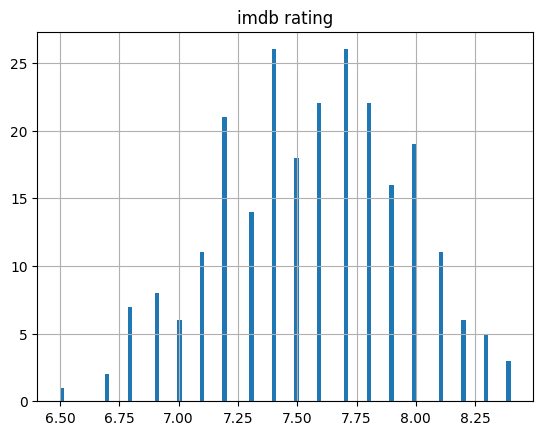

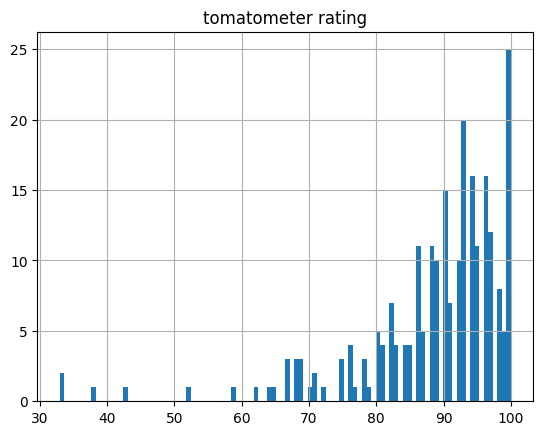

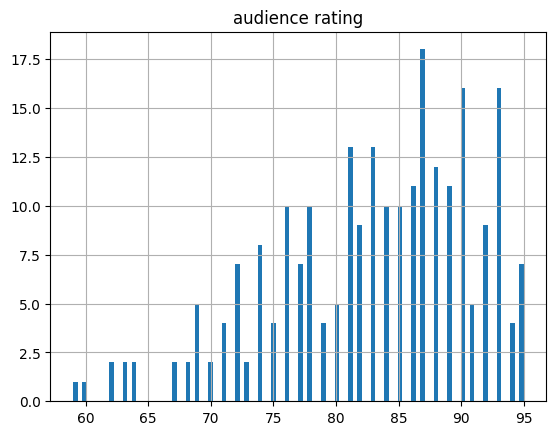

In [133]:
filtered_outlier = data_filtered[['imdb rating','tomatometer rating','audience rating']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

Сравним с выбросами и без по imdb rating

array([[<Axes: title={'center': 'imdb rating'}>]], dtype=object)

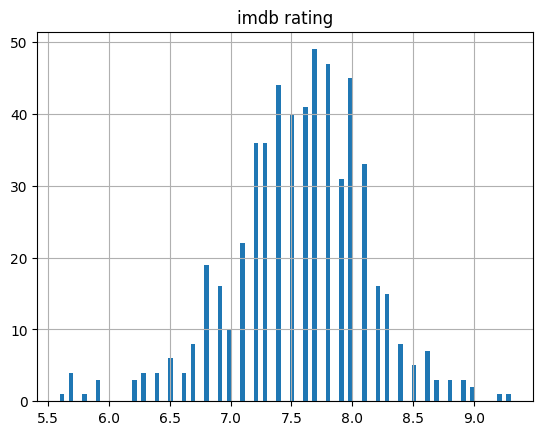

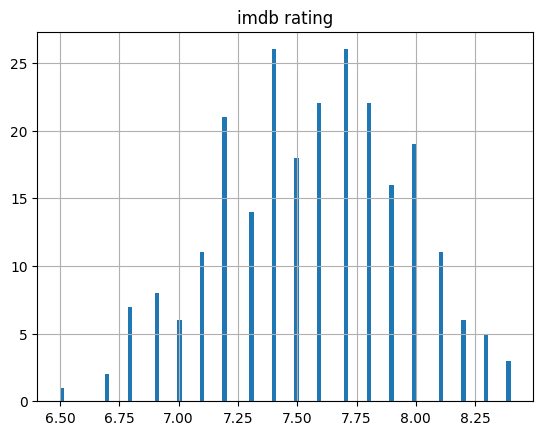

In [134]:
df.hist('imdb rating', bins=100)
data_filtered.hist('imdb rating', bins=100)

посмотрим на оценки imdb и tomatos относительно получения оскара

In [135]:
won = data_filtered.query('award == "Winner"')
nomined	= data_filtered.query('award == "Nominee"')

Text(0.5, 1.0, 'Nominee')

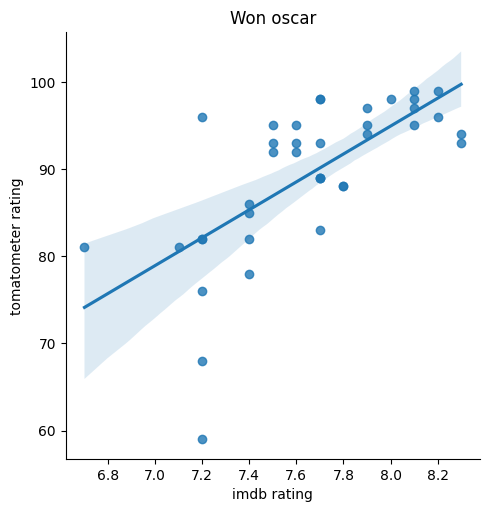

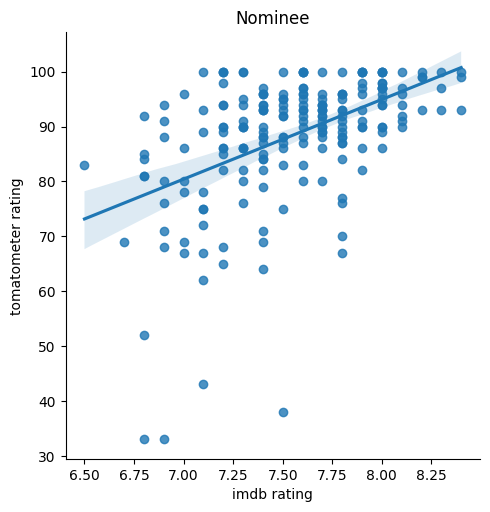

In [136]:
sns.lmplot(x="imdb rating", y="tomatometer rating", data = won)
plt.title('Won oscar')
sns.lmplot(x="imdb rating", y="tomatometer rating", data = nomined)
plt.title('Nominee')

<Axes: title={'center': 'imdb rating'}, xlabel='tomatometer status'>

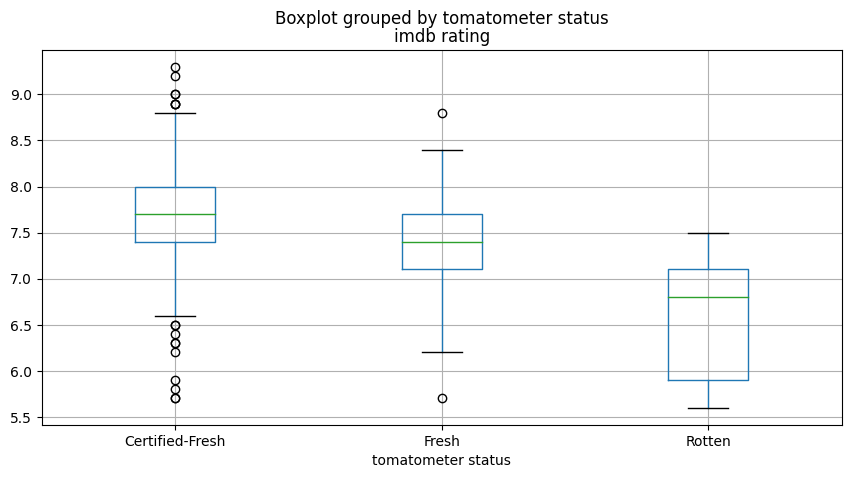

In [141]:
df.boxplot(by ='tomatometer status', column ='imdb rating',figsize=(10,5), grid = True)

<Axes: title={'center': 'imdb rating'}, xlabel='tomatometer status'>

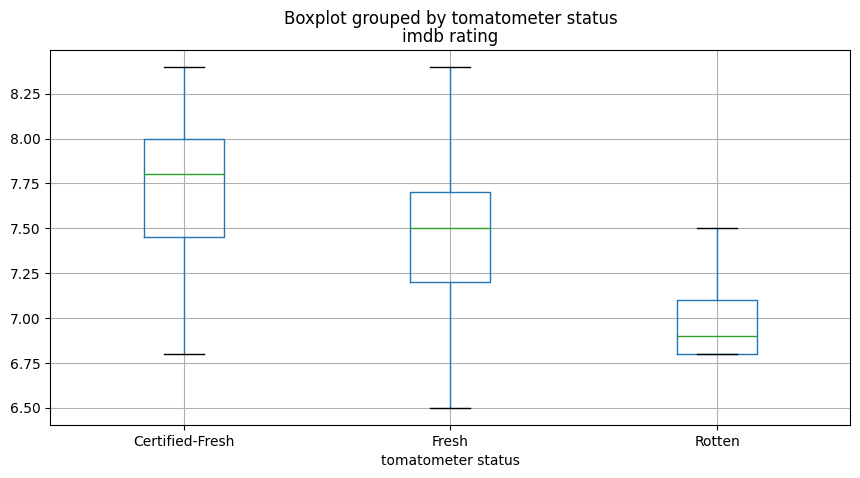

In [142]:
nomined.boxplot(by ='tomatometer status', column ='imdb rating',figsize=(10,5), grid = True)

<Axes: title={'center': 'imdb rating'}, xlabel='tomatometer status'>

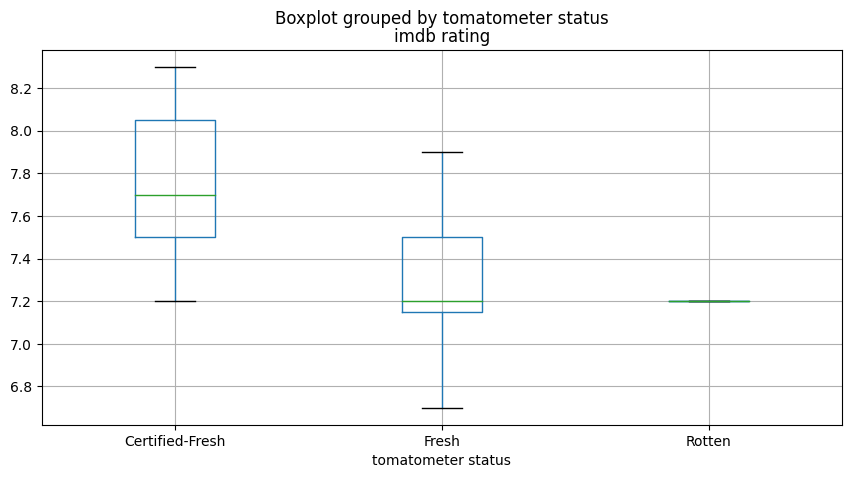

In [143]:
won.boxplot(by ='tomatometer status', column ='imdb rating',figsize=(10,5), grid = True)